# Part 1 -  Does Renovation Effect House Price?

Here we will Ask 3 question:
    1. Does the house price go down as the age of the building increase?
    2. Does the the house price go down as time since renovation increases?
    3. If the house was not renovated:
           ->  Does the house price decrecre more than if it would have been renovated.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('kc_house_data_clean.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,month_year,price_bands
0,0,7.129301e+09,10/13/2014,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,...,98178.0,47.5112,-122.257,1340.0,5650.0,2014.0,10.0,13.0,13-2014,200K to 300K
1,1,6.414100e+09,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,...,98125.0,47.7210,-122.319,1690.0,7639.0,2014.0,12.0,9.0,9-2014,500K to 600K
2,2,5.631500e+09,2/25/2015,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,...,98028.0,47.7379,-122.233,2720.0,8062.0,2015.0,2.0,25.0,25-2015,100K to 200K
3,3,2.487201e+09,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,...,98136.0,47.5208,-122.393,1360.0,5000.0,2014.0,12.0,9.0,9-2014,600K to 700K
4,4,1.954401e+09,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,...,98074.0,47.6168,-122.045,1800.0,7503.0,2015.0,2.0,18.0,18-2015,500K to 600K


## Add in Correlation Calculator

In [3]:
def mean_normalize(var):
    norm = []
    
    mean = sum(var)/len(var)
    
    for i in var:
        norm.append(i-mean)
    
    return norm

def dot_product(x, y):
    prodcut = 0
    
    for i in range(len(x)):
        prd = x[i]*y[i]
        prodcut += prd
    return prodcut

def covariance(var1, var2):
    n = len(var1)
    x = mean_normalize(var1)
    y = mean_normalize(var2)
    
    dot_product(x, y)
    
def correlation(var1, var2): # Calculates the "r" value.
    
    if len(var1) != len(var2):
        return 'The lengths of both the lists should be equal.' 
    else: 
       
        mean_norm_var1 = mean_normalize(var1)
        mean_norm_var2 = mean_normalize(var2)
        
        var1_dot_var2 = dot_product(mean_norm_var1, mean_norm_var2)
        
        var1_squared = [i * i for i in mean_norm_var1]
        var2_squared = [i * i for i in mean_norm_var2]
        
        return round(var1_dot_var2 / math.sqrt(sum(var1_squared) * sum(var2_squared)), 2)

## Add Regrestion Line Calculator

In [42]:
def calc_slope(xs, ys):

    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs*xs)))
    
    return m

def calc_intercept(xs, ys):

    m = calc_slope(xs, ys)
    c = np.mean(ys) - m*np.mean(xs)
    
    return c

def reg_line (m, c, X):
    
    return [(m*x)+c for x in X]

def sum_sq_err(ys_real, ys_predicted):

    sse =  sum((ys_predicted - ys_real) * (ys_predicted - ys_real))
    
    return sse

def r_squared(ys_real, ys_predicted):
    
    # Calculate Y_mean , squared error for regression and mean line , and calculate r-squared
    y_mean = [np.mean(ys_real) for y in ys_real]

    sq_err_reg = sum_sq_err(ys_real, ys_predicted)
    sq_err_y_mean = sum_sq_err(ys_real, y_mean)
    
    # Calculate r-squared 
    r_sq =  1 - (sq_err_reg/sq_err_y_mean)
    
    return r_sq

def reg_basic_and_plot(X, Y, title):
    
    m = calc_slope(X,Y)
    c = calc_intercept(X,Y)
    Y_pred = reg_line(m, c, X)
    r = correlation(X,Y)
    r_sqrd = r_squared(Y,Y_pred)
    
    print ('Basic Regression Diagnostics')
    print ('----------------------------')
    print ('Slope:', round(m, 2))
    print ('Y-Intercept:', round(c, 2))
    print ('Correlation:', r)
    print ('R-Squared:', round(r_sqrd, 2))
    print ('----------------------------')
    print ('Model: Y =',round(m, 2),'* X +', round(c, 2))
    
    
    plt.scatter(X, Y, color='#003F72', label='data')
    plt.plot(X, Y_pred, label='regression line')
    plt.title(title)
    plt.legend(loc=2)
    plt.show()
    return None

## Create:  "age" column

In [5]:
now = 2016

In [6]:
df['age'] = now - df['yr_built']

## Create: age since renovation column

In [7]:
df['age_since_ren'] = now - df['yr_renovated']

In [8]:
df['age_since_ren'].unique()

array([2016,   25,   14,    6,   24,    3,   22,   38,   11,   13,   32,
         62,    2,    5,   33,   71,   26,   28,   39,   35,   21,   16,
         17,   18,   46,   27,   12,   30,    9,   29,   10,   31,   36,
         45,   37,   19,   66,   47,   68,    7,    1,   42,    8,   48,
          4,   53,   65,   54,   15,   63,   23,   20,   61,   34,   60,
         76,   40,   41,   52,   43,   59,   57,   56,   49,   51,   82,
         44,   72,   58])

In [9]:
df['age_since_ren'].head()

0    2016
1      25
2    2016
3    2016
4    2016
Name: age_since_ren, dtype: int64

## Create a column Renovated Yes/No

In [10]:
is_renovated = df['yr_renovated']
is_renovated.describe().apply(lambda x: format(x, 'f'))
temp = []
for ren in is_renovated:
    if ren > 0:
        temp.append(1)
    else:
        temp.append(0)
        
df['is_ren'] = temp
        

In [11]:
df['is_ren'].unique()

array([0, 1])

# 1a. Data Frame - Renovated House's



Create a new DataFrame but just for houses which have been renovated

In [12]:
df_ren = df.loc[df['yr_renovated'] != 0]

In [13]:
df_ren.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_living15,sqft_lot15,year,month,day,month_year,price_bands,age,age_since_ren,is_ren
1,1,6.414100e+09,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,...,1690.0,7639.0,2014.0,12.0,9.0,9-2014,500K to 600K,65,25,1
35,35,9.547205e+09,6/13/2014,696000.0,3.0,2.50,2300.0,3060.0,1.5,0.0,...,1590.0,3264.0,2014.0,6.0,13.0,13-2014,600K to 700K,86,14,1
95,95,1.483301e+09,9/8/2014,905000.0,4.0,2.50,3300.0,10250.0,1.0,0.0,...,1950.0,6045.0,2014.0,9.0,8.0,8-2014,900K to 1M,70,25,1
103,103,2.450000e+09,10/7/2014,1090000.0,3.0,2.50,2920.0,8113.0,2.0,0.0,...,2370.0,8113.0,2014.0,10.0,7.0,7-2014,900K to 1M,66,6,1
125,125,4.389201e+09,3/2/2015,1450000.0,4.0,2.75,2750.0,17789.0,1.5,0.0,...,3060.0,11275.0,2015.0,3.0,2.0,2-2015,900K to 1M,102,24,1


In [14]:
df_ren.shape

(723, 30)

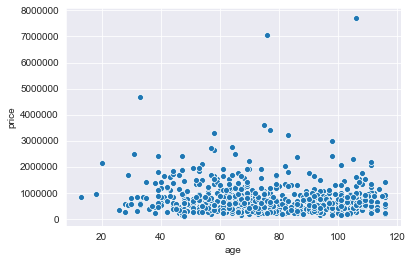

In [15]:
sns.scatterplot(data=df_ren, x=df_ren['age'], y=df_ren['price'])

Basic Regression Diagnostics
----------------------------
Slope: -2045.39
Y-Intercept: 924176.48
Correlation: -0.07
R-Squared: 0.01
----------------------------
Model: Y = -2045.39 * X + 924176.48


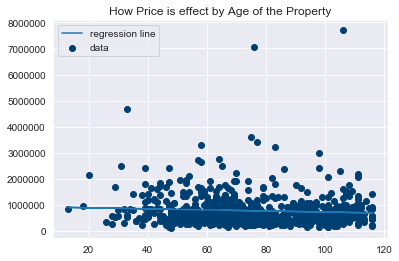

In [43]:
reg_basic_and_plot(df_ren['age'], df_ren['price'], "How Price is effect by Age of the Property")

Just checking that all the renovated house have year built values. As in the initial dataframe the there were yr_bulit values equal to zero.

In [16]:
df_ren['yr_built'].unique()

array([1951, 1930, 1946, 1950, 1914, 1916, 1920, 1957, 1915, 1904, 1954,
       1905, 1922, 1928, 1909, 1976, 1925, 1943, 1965, 1903, 1937, 1911,
       1912, 1960, 1958, 1972, 1959, 1942, 1938, 1968, 1907, 1982, 1936,
       1964, 1998, 1921, 1952, 1919, 1910, 1975, 1984, 1917, 1944, 1924,
       1900, 1988, 1913, 1923, 1908, 1935, 1945, 1941, 1918, 1926, 1932,
       1970, 1939, 1962, 1947, 1966, 1974, 1948, 1956, 1940, 1978, 1955,
       1983, 1934, 1949, 1977, 1963, 1953, 1990, 1931, 1981, 1902, 1969,
       1927, 1987, 1967, 1986, 1980, 1929, 1973, 1933, 1961, 1906, 1971,
       1979, 1901, 1985, 2003, 1996])

# 1b. DataFrame - Non_Renovated House's

There was a house that it's year built was zero so it must be excluded from this data frame.

In [18]:
df_non_ren = df.loc[(df['yr_renovated'] == 0) & (df['yr_built'] != 0)]

In [19]:
df_non_ren.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_living15,sqft_lot15,year,month,day,month_year,price_bands,age,age_since_ren,is_ren
0,0,7.129301e+09,10/13/2014,221900.0,3.0,1.0,1180.0,5650.0,1.0,0.0,...,1340.0,5650.0,2014.0,10.0,13.0,13-2014,200K to 300K,61,2016,0
2,2,5.631500e+09,2/25/2015,180000.0,2.0,1.0,770.0,10000.0,1.0,0.0,...,2720.0,8062.0,2015.0,2.0,25.0,25-2015,100K to 200K,83,2016,0
3,3,2.487201e+09,12/9/2014,604000.0,4.0,3.0,1960.0,5000.0,1.0,0.0,...,1360.0,5000.0,2014.0,12.0,9.0,9-2014,600K to 700K,51,2016,0
4,4,1.954401e+09,2/18/2015,510000.0,3.0,2.0,1680.0,8080.0,1.0,0.0,...,1800.0,7503.0,2015.0,2.0,18.0,18-2015,500K to 600K,29,2016,0
5,5,7.237550e+09,5/12/2014,1230000.0,4.0,4.5,5420.0,101930.0,1.0,0.0,...,4760.0,101930.0,2014.0,5.0,12.0,12-2014,900K to 1M,15,2016,0


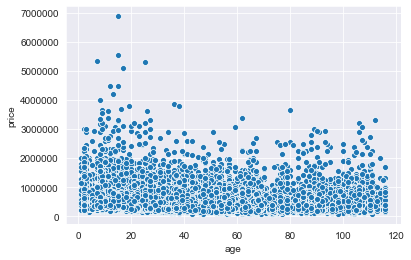

In [20]:
sns.scatterplot(data=df_non_ren, x=df_non_ren['age'], y=df_non_ren['price'])

Basic Regression Diagnostics
----------------------------
Slope: -996.65
Y-Intercept: 576181.8
Correlation: -0.08
R-Squared: 0.01
----------------------------
Model: Y = -996.65 * X + 576181.8


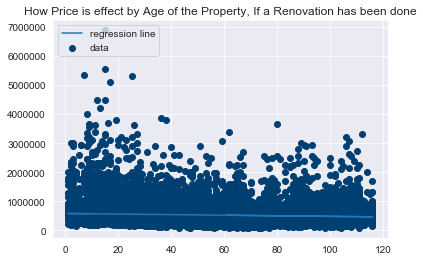

In [44]:
reg_basic_and_plot(df_non_ren['age'], df_non_ren['price'], "How Price is effect by Age of the Property, If a Renovation has been done")

Just checking that all the non-renovated house have year built values. As in the initial dataframe the there were yr_bulit values equal to zero.

In [39]:
sorted(df_non_ren['yr_built'].unique())

[1900,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

# Part 2 - Breaking the Houses Clasifications 

In this section we will be breaking down the houses into further catagorise and comapreing the non-renovated top the renovated in diffent metrics:

    2a. Price Bands
    2b. Number of Bedrooms
    2c. Number of Bathrooms
    2d. sqft_lot
    2e. sqft_living
    2f. Building Condition
    2g. Building Grade

### Create: DataFrame the excludes houses that have unknow build date

In [22]:
df_known_build_date = df.loc[(df['yr_built'] != 0)]

### 2a. Price Band - Renovated

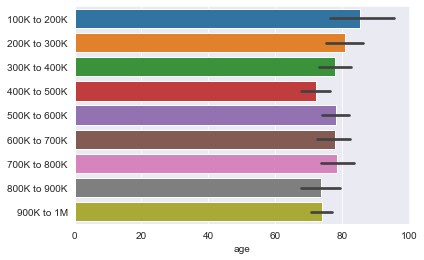

In [23]:
sns.barplot(y=sorted(df_ren['price_bands']), x=df_ren['age']) # title="Price Bands to age of property"

In [24]:
# df_ren.set_index(df_ren['price_bands'])

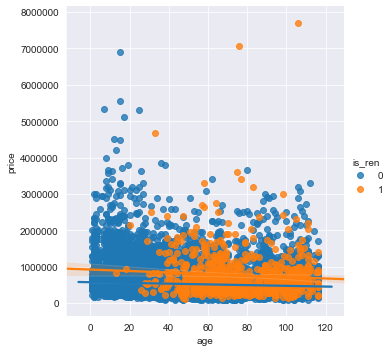

In [25]:
sns.lmplot(data=df_known_build_date, x="age", y="price", hue="is_ren")

## Renovated - Bedrooms

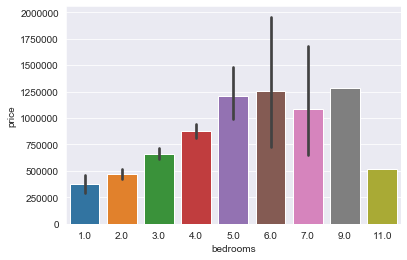

In [27]:
sns.barplot(x=df_ren['bedrooms'], y=df_ren['price'])